In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    biases_input_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    biases_hidden_output = np.zeros((1, output_size))
    return weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output

In [ ]:
def forward_propagation(X, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output):
    hidden_layer_output = sigmoid(np.dot(X, weights_input_hidden) + biases_input_hidden)
    output_layer_output = sigmoid(np.dot(hidden_layer_output, weights_hidden_output) + biases_hidden_output)
    return hidden_layer_output, output_layer_output

In [ ]:
def backpropagation(X, y, hidden_layer_output, output_layer_output, weights_hidden_output):
    output_error = y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
    return output_delta, hidden_delta

In [ ]:
def train(X, y, learning_rate, num_epochs):
    input_size = X.shape[1]
    output_size = y.shape[1]
    hidden_size = 12
    weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(num_epochs):
        hidden_layer_output, output_layer_output = forward_propagation(X, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output)
        output_delta, hidden_delta = backpropagation(X, y, hidden_layer_output, output_layer_output, weights_hidden_output)
        weights_hidden_output += learning_rate * np.dot(hidden_layer_output.T, output_delta)
        biases_hidden_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        weights_input_hidden += learning_rate * np.dot(X.T, hidden_delta)
        biases_input_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)
    return weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output


In [ ]:
def predict(X, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_input_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_hidden_output
    output_layer_output = softmax(output_layer_input)
    return output_layer_output


In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [ ]:
import numpy as np

def generate_synthetic_data_with_relation(num_samples, num_features, num_classes):
    np.random.seed(42)
    features = np.random.randn(num_samples, num_features)
    weights = np.random.randn(num_features, num_classes)
    logits = np.dot(features, weights)
    softmax_probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
    labels = np.argmax(softmax_probs, axis=1)
    return features, labels

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report


num_samples = 1000
num_features = 4
num_classes = 3
X, y = generate_synthetic_data_with_relation(num_samples=num_samples, num_features=num_features, num_classes=num_classes)

# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the neural network
learning_rate = 0.1
num_epochs = 10000
weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output = train(X_train, y_train, learning_rate, num_epochs)

# Make predictions on the test set
predictions = predict(X_test, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output)

# Convert predictions to class labels based on maximum value
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

class_labels = [f"Class {i}" for i in range(num_classes)]
classification_rep = classification_report(np.argmax(y_test, axis=1), predicted_labels, target_names=class_labels)
print("Classification Report:")
print(classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.8750
Confusion Matrix:
[[70  0  0]
 [ 6 33 19]
 [ 0  0 72]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96        70
     Class 1       1.00      0.57      0.73        58
     Class 2       0.79      1.00      0.88        72

    accuracy                           0.88       200
   macro avg       0.90      0.86      0.86       200
weighted avg       0.90      0.88      0.86       200



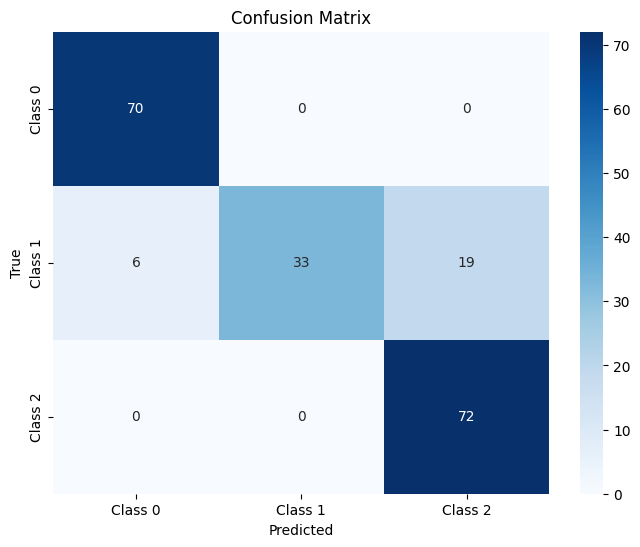

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()